**Question-1**

You are given a binary tree. The binary tree is represented using the TreeNode class. Each TreeNode has an integer value and left and right children, represented using the TreeNode class itself. Convert this binary tree into a binary search tree.

Input:

            10

           /   \

         2      7

       /   \

     8      4

Output:

            8

          /   \

        4     10

      /   \

    2      7

In [1]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def binary_tree_to_bst(root):
    def traverse(node):
        if node is None:
            return []
        return traverse(node.left) + [node.value] + traverse(node.right)
    
    values = traverse(root)

    values.sort()

    def update_values(node, values):
        if node is None:
            return

        update_values(node.left, values)
        node.value = values.pop(0)
        update_values(node.right, values)

    update_values(root, values)
    return root

In [2]:

root = TreeNode(10)
root.left = TreeNode(2)
root.right = TreeNode(7)
root.left.left = TreeNode(8)
root.left.right = TreeNode(4)

bst_root = binary_tree_to_bst(root)

def in_order_traversal(node):
    if node is None:
        return
    in_order_traversal(node.left)
    print(node.value, end=" ")
    in_order_traversal(node.right)

in_order_traversal(bst_root)


2 4 7 8 10 

**Question-2:**

Given a Binary Search Tree with all unique values and two keys. Find the distance between two nodes in BST. The given keys always exist in BST.

Example:
Consider the following BST:
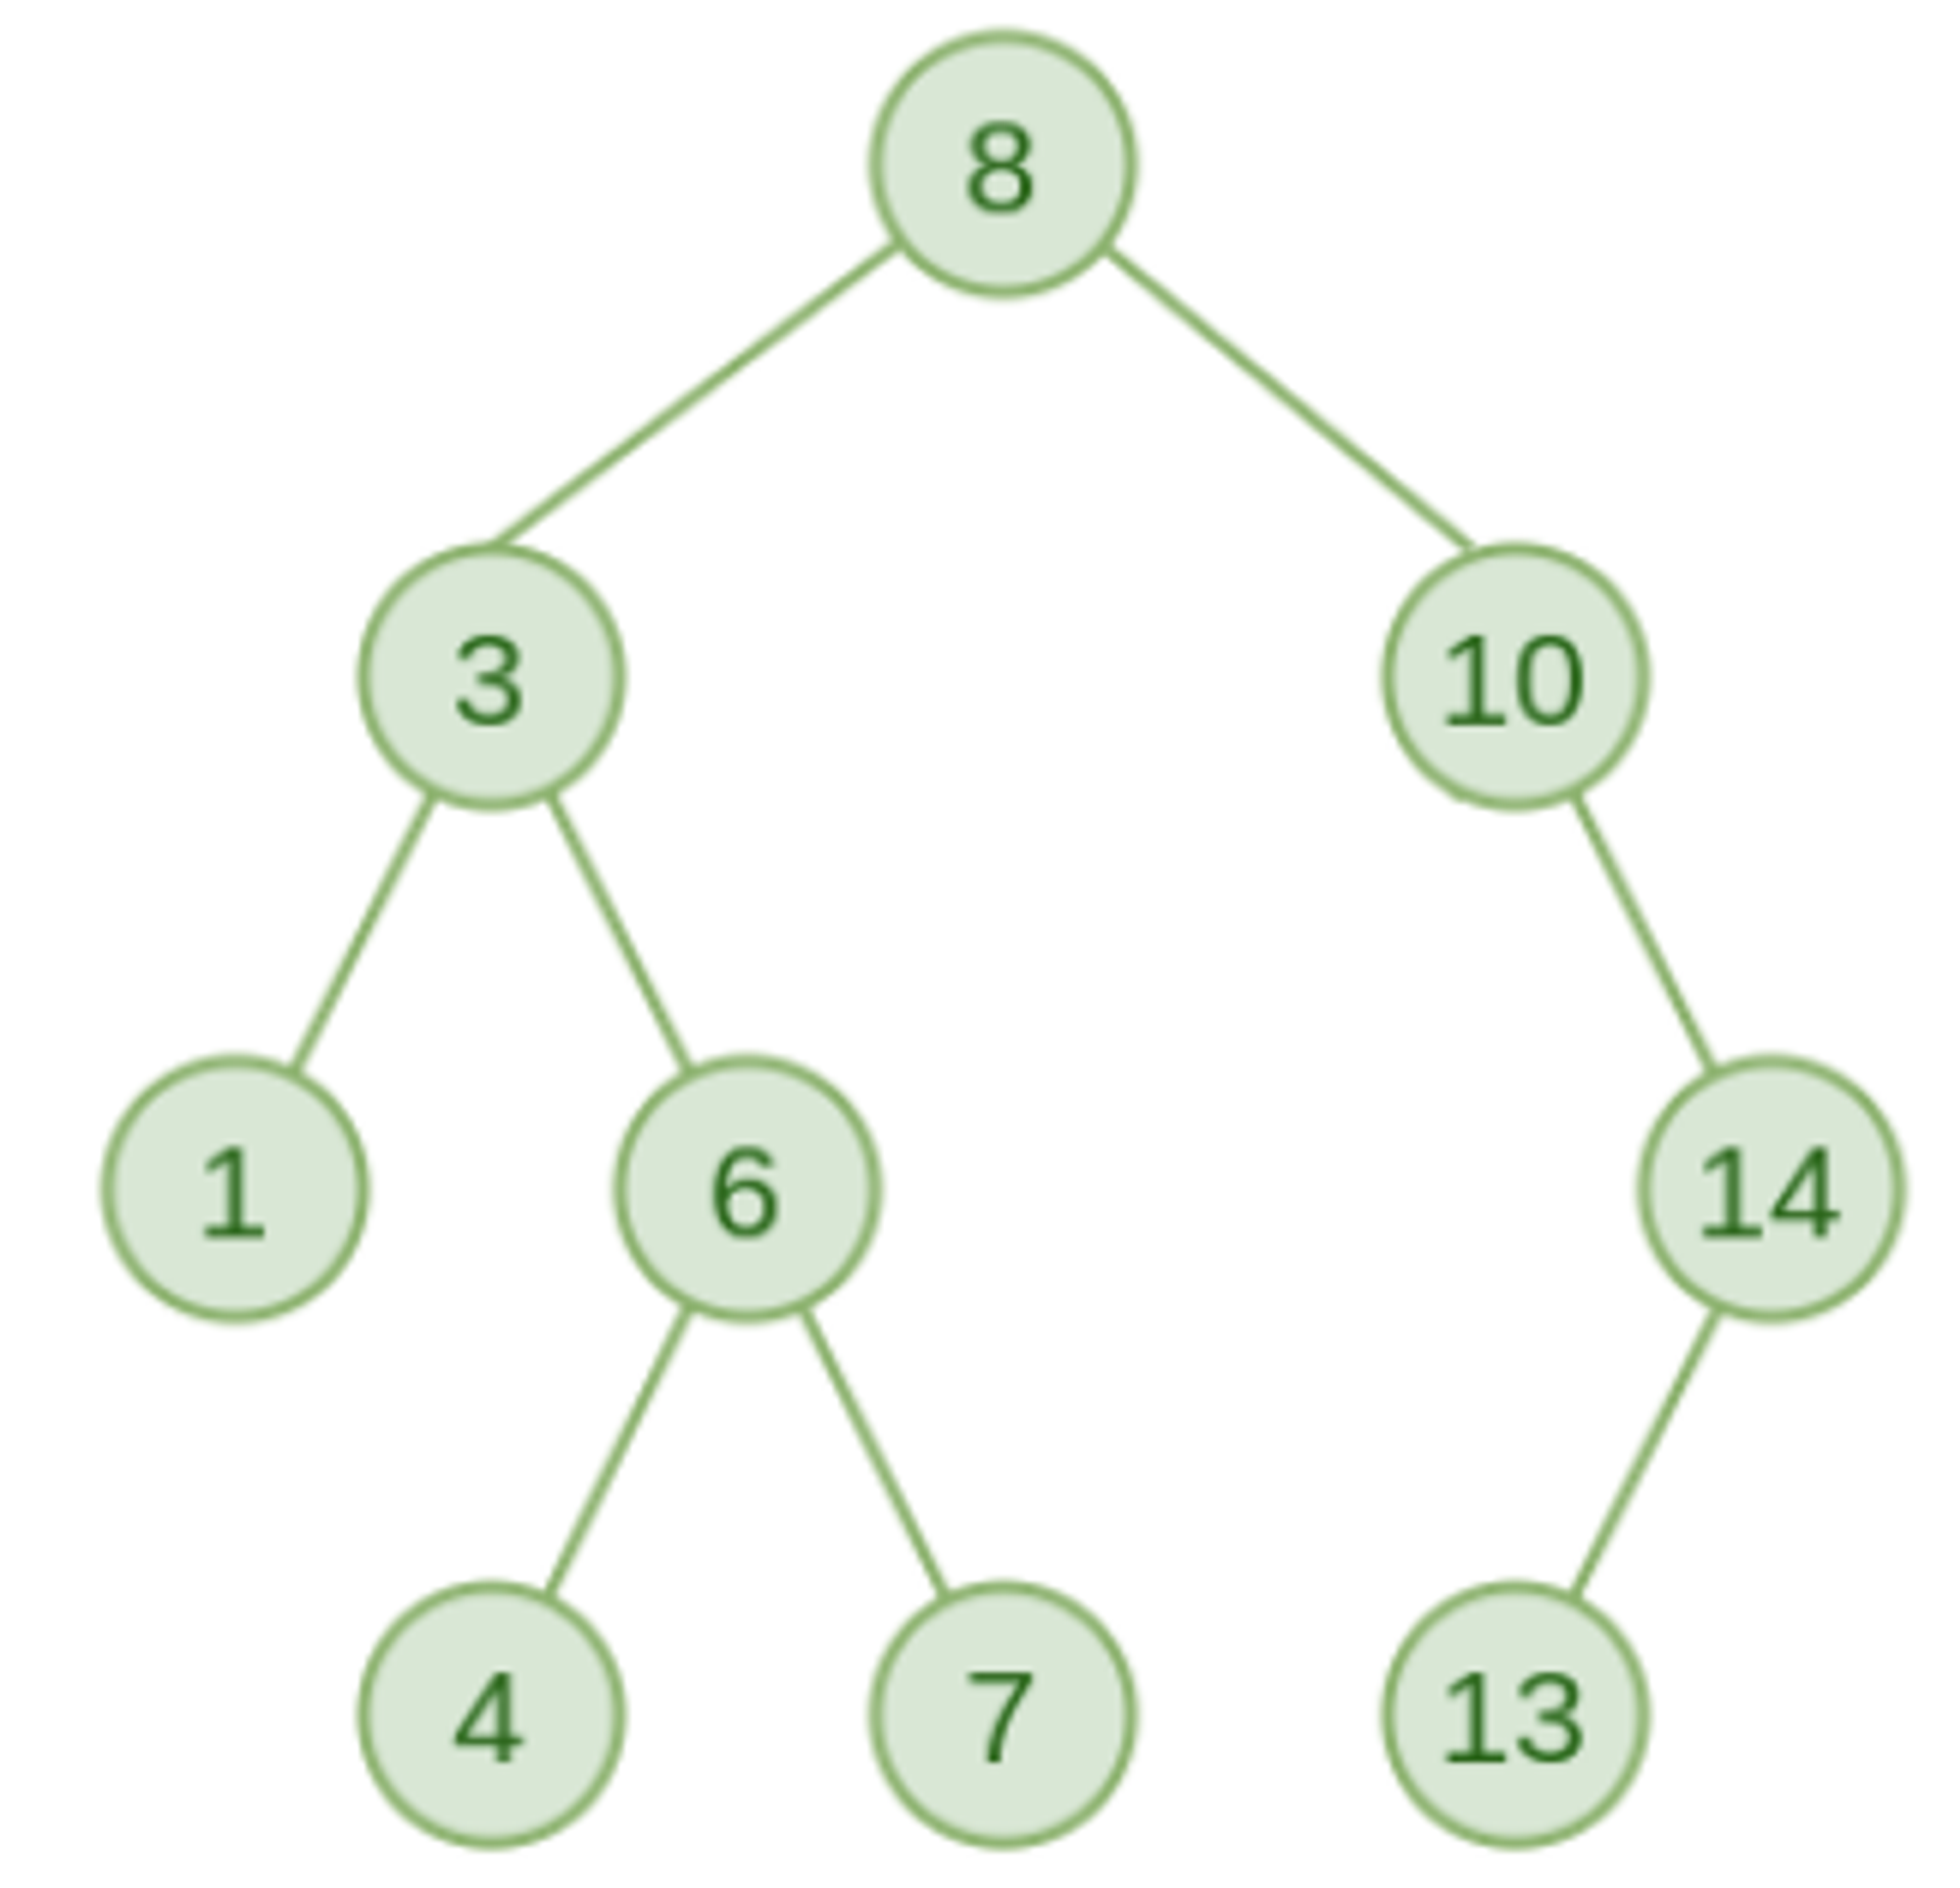

**Input-1:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 6

node-2 = 14

**Output-1:**

The distance between the two keys = 4

**Input-2:**

n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node-1 = 3

node-2 = 4

**Output-2:**

The distance between the two keys = 2

In [3]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


def find_distance(root, node1, node2):
    # Find the path from the root to a given node in the BST
    def find_path(root, target, path):
        if root is None:
            return False

        path.append(root.value)

        if root.value == target:
            return True

        if target < root.value:
            return find_path(root.left, target, path)
        else:
            return find_path(root.right, target, path)

    # Find the lowest common ancestor (LCA) of two nodes
    def find_lca(root, node1, node2):
        if root is None:
            return None

        if root.value > node1 and root.value > node2:
            return find_lca(root.left, node1, node2)
        elif root.value < node1 and root.value < node2:
            return find_lca(root.right, node1, node2)
        else:
            return root

    # Find the distance between a node and the LCA
    def find_distance_to_lca(root, node, distance):
        if root is None:
            return 0

        if root.value == node:
            return distance

        if node < root.value:
            return find_distance_to_lca(root.left, node, distance + 1)
        else:
            return find_distance_to_lca(root.right, node, distance + 1)

    # Find the distance between two nodes in the BST
    path1 = []
    path2 = []

    find_path(root, node1, path1)
    find_path(root, node2, path2)

    lca = find_lca(root, node1, node2)

    distance1 = find_distance_to_lca(lca, node1, 0)
    distance2 = find_distance_to_lca(lca, node2, 0)

    distance = distance1 + distance2

    return distance

In [8]:
#Example1
values = [8, 3, 1, 6, 4, 7, 10, 14, 13]
root = None

# Create the Binary Search Tree from the given values
for value in values:
    if root is None:
        root = TreeNode(value)
    else:
        current = root
        while True:
            if value < current.value:
                if current.left is None:
                    current.left = TreeNode(value)
                    break
                else:
                    current = current.left
            else:
                if current.right is None:
                    current.right = TreeNode(value)
                    break
                else:
                    current = current.right

node1 = 6
node2 = 14
distance = find_distance(root, node1, node2)

print("The distance between the two keys =", distance)

The distance between the two keys = 4


In [9]:
#Example2:
values = [8, 3, 1, 6, 4, 7, 10, 14, 13]
node1 = 3
node2 = 4

distance = find_distance(root, node1, node2)
print("The distance between the two keys =", distance)

The distance between the two keys = 2


**Question-3:**

Write a program to convert a binary tree to a doubly linked list.

Input:

        10

       /   \

     5     20

           /   \

        30     35

Output:

5 10 30 20 35

In [6]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class DoublyLinkedListNode:
    def __init__(self, value):
        self.value = value
        self.prev = None
        self.next = None


def convert_to_doubly_linked_list(root):
    # Initialize previous node as None
    prev = None

    def inorder_traversal(node):
        nonlocal prev

        if node is None:
            return None

        # Convert left subtree
        head = inorder_traversal(node.left)

        # Update left pointer of the current node
        node.left = prev

        if prev is not None:
            prev.right = node

        prev = node

        inorder_traversal(node.right)

        return head if head is not None else node

    head = inorder_traversal(root)

    while head.left is not None:
        head = head.left

    return head


# Create the binary tree
root = TreeNode(10)
root.left = TreeNode(5)
root.right = TreeNode(20)
root.right.left = TreeNode(30)
root.right.right = TreeNode(35)

dll_head = convert_to_doubly_linked_list(root)

current = dll_head
while current is not None:
    print(current.value, end=" ")
    current = current.right

5 10 30 20 35 

**Question-4:**

Write a program to connect nodes at the same level.

Input:

                    1

                  /   \

                2      3

              /   \   /   \

            4     5   6    7

Output:

1 → -1

2 → 3

3 → -1

4 → 5

5 → 6

6 → 7

7 → -1


In [7]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.next = None


def connect_nodes_at_same_level(root):
    if root is None:
        return

    sentinel = Node(-1)

    queue = [root, sentinel]

    while len(queue) > 1:
        node = queue.pop(0)

        if node == sentinel:
            queue.append(sentinel)
            continue

        node.next = queue[0] if queue[0] != sentinel else None

        if node.left is not None:
            queue.append(node.left)

        if node.right is not None:
            queue.append(node.right)


# Create the binary tree
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)

connect_nodes_at_same_level(root)

current = root
while current is not None:
    level_start = current
    while level_start is not None:
        print(level_start.value, end=" → ")
        level_start = level_start.next
    print("-1")
    current = current.left

1 → -1
2 → 3 → -1
4 → 5 → 6 → 7 → -1
